# Chapter 7 figures 7.3, 7.4 and 7.5 

This file solves the model of Chapter 7.6 and produces figures 7.3, 7.4, and 7.5

In [13]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()
include("longbonds_cont_time.jl")

  Activating environment at `~/Github/TheEconomicsofSovereignDebt/scripts/Ch7_simplemodel/Project.toml`


solve_efficient (generic function with 1 method)

In [14]:
using LaTeXStrings
pgfplotsx();

┌ Info: Precompiling PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1342


In [15]:
# define tolerance
_BV_TOL = 10.0^(-12);
_ODE_TOL = (abstol=10.0^(-6), reltol=10.0^(-6));

## Benchmark

In [16]:
m = LongBondModel(δ=BigFloat(0.2)); # using high precision
#solve for the competitive equilibrium
@info "Solving Competitive Equilibrium"
sol = solve_equilibrium(m, bv_tol=_BV_TOL, ode_tol=_ODE_TOL);
#solve for the efficient allocation
@info "Solving Planner's Problem"
eff = solve_efficient(m, ode_tol=_ODE_TOL);

┌ Info: Solving Competitive Equilibrium
└ @ Main In[16]:3
┌ Info: Solving Planner's Problem
└ @ Main In[16]:6


In [17]:
default(size=(600,400),xtickfontsize=14,ytickfontsize=14,yguidefontsize=16,xguidefontsize=16)

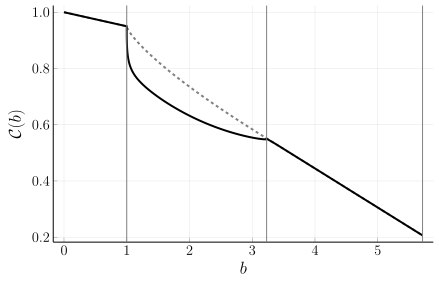

In [18]:
#plot consumption policy
#Figure 7.3(a)
f = plot(sol.b, sol.css, line=(2, :dash,), color=:gray,
xlabel="\$b\$", ylabel=L"\mathcal C(b)"); 
plot!(f, sol.b, sol.c, line=(2), color=:black, legend=false)
vline!(f, [sol.b̲, sol.b̅, sol.bI], line=(1,  :gray))
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_3a.pdf" ))
f

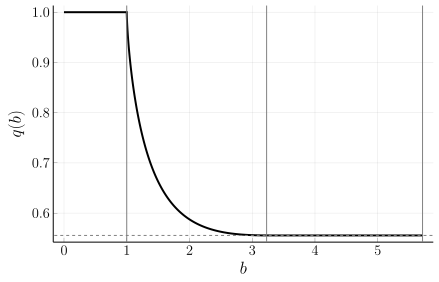

In [19]:
#plot eqm price schedule
#Figure 7.3(b)
f = plot(sol.b, sol.q, line=(2), color=:black, legend=false, 
xlabel="\$b\$", ylabel=L"q(b)")
hline!(f, [sol.m.q̲], line=(1, :dash, :gray))
vline!(f, [sol.b̲, sol.b̅, sol.bI], line=(1, :gray))
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_3b.pdf" ))
f

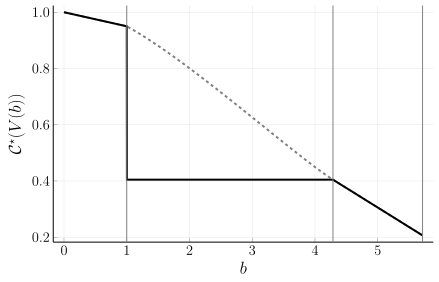

In [20]:
#plot efficient consumption
#Figure 7.3(c)
f = plot(eff.b, eff.css, line=(2, :dash,), color=:gray,
xlabel="\$b\$", ylabel=L"\mathcal C^\star(V(b))"); 
plot!(f, eff.b, eff.c, line=(2), color=:black, legend=false)
vline!(f, [eff.b̲, eff.b̅, eff.bI], line=(1,  :gray))
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_3c.pdf" ))
f

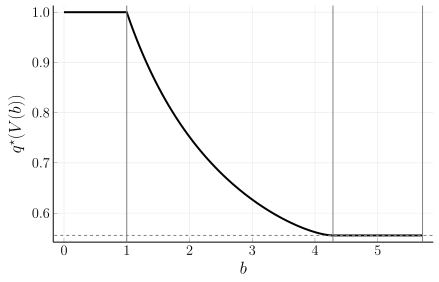

In [21]:
#plot efficient price
#Figure 7.3(d)
f = plot(eff.b, eff.q, line=(2), color=:black, legend=false, 
xlabel="\$b\$", ylabel=L"q^\star(V(b))")
hline!(f, [eff.m.q̲], line=(1, :dash, :gray))
vline!(f, [eff.b̲, eff.b̅, eff.bI], line=(1, :gray))
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_3d.pdf" ))
f

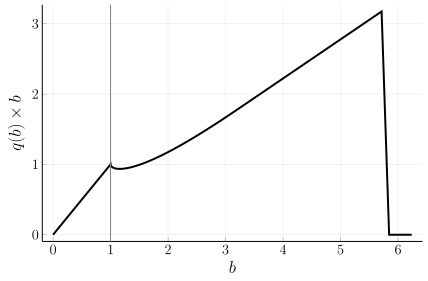

In [22]:
#Debt Laffer Curve
#Figure 7.4
diff = sol.b[end] - sol.b[end-1]
f = plot(
    vcat(
        sol.b, 
        [sol.b[end] + i * diff for i in range(1, 4, step=1)]
        ), 
    vcat(
        sol.q .* sol.b, 
        [0.0 for i in range(1, 4, step=1)]
        ), 
    line=(2), 
    color=:black)
plot!(f, legend=false, color=:black)
plot!(f,  ylabel="\$q(b)\\times b\$", xlabel="\$b\$")
vline!(f, [sol.b̲], line=(1,  :gray))
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_4.pdf" ))
f

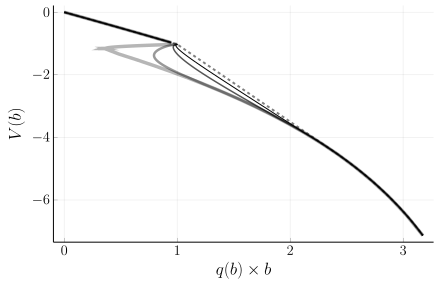

In [23]:
#Pareto Frontier
#Figure 7.5
f = plot([eff.q .* eff.b], eff.v, legend=false, line=(2, :dash, :gray))
for (δ, w) in zip((0.02, 0.1, 0.3, 0.7), (3.5, 2.5, 1.5, 1.))
    sol = solve_equilibrium(LongBondModel(δ=δ))
    bindex = findlast(b -> b < sol.b̲, sol.b)
    plot!(f, [sol.q[1:bindex] .* sol.b[1:bindex]], sol.v[1:bindex], line=(w), alpha=1/w, color=:black)
    plot!(f, [sol.q[bindex+1:end] .* sol.b[bindex+1:end]], sol.v[bindex+1:end], line=(w), alpha=1/w, color=:black)
end
plot!(f, xlabel="\$q(b) \\times b\$", ylabel="\$V(b)\$")
savefig(f,joinpath(@__DIR__,"..","..","output","Chapter7","fig_7_5.pdf" ))
f